In [2]:
# Student: Casey Cook, ID#: 801085944, Homework 0 

In [3]:
###### PROBLEM 1 ##############################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('D3.csv') # searches for files to read in "Code Examples" folder
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)
M

99

In [5]:
x1 = df.values[:, 0] # get input values from first column
x2 = df.values[:, 1] # get output values from second column
x3 = df.values[:, 2]
Y = df.values[:, 3]

m = len(x1) # Number of training examples
print('x1 = ', x1[: 5]) # Show only first 5 records
print('x2 = ', x2[: 5])
print('x3 = ', x3[: 5])
print('Y = ', Y[: 5])
print('m = ', m)

size = np.shape(x1) # Check array dimensions
size

x1 =  [0.04040404 0.08080808 0.12121212 0.16161616 0.2020202 ]
x2 =  [0.13494949 0.82989899 1.52484848 2.21979798 2.91474747]
x3 =  [0.88848485 1.3369697  1.78545455 2.23393939 2.68242424]
Y =  [2.6796499  2.96848981 3.25406475 3.53637472 3.81541972]
m =  99


(99,)

In [6]:
X_0 = np.ones((m, 1)) # Create a 99x1 array of ones
X_1 = x1.reshape(m, 1) # Using reshape function convert x1, x2, x3 1D arrays to 2D arrays of dimension 99x1
X_2 = x2.reshape(m, 1)
X_3 = x3.reshape(m, 1)

print('X_1 = ', X_1[:10])

X_1 =  [[0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]
 [0.2020202 ]
 [0.24242424]
 [0.28282828]
 [0.32323232]
 [0.36363636]
 [0.4040404 ]]


In [42]:
X_a = np.hstack((X_0, X_1)) # Use hstack to add a column to create 99x2 array
X_b = np.hstack((X_0, X_2))
X_c = np.hstack((X_0, X_3))

print('X_b = ',X_b[:5])

X_b =  [[1.         0.13494949]
 [1.         0.82989899]
 [1.         1.52484848]
 [1.         2.21979798]
 [1.         2.91474747]]


In [8]:
theta = np.array([0,0]) # Create array for theta values, initialize to zero

In [9]:
def compute_cost(x, y, theta): # Compute cost for linear regression.

    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors) # cost function, sum of squared errors
    return J

In [10]:
def gradient_descent(x, y, theta, alpha, iterations): # Compute cost for linear regression.

    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(x, y, theta)
    return theta, cost_history

In [11]:
# Test on data in list x1 and Y
theta = [0., 0.] # Theta initialized to 0
iterations = 1500;

alpha1_1 = 0.01; # Comparing 3 different training rates
alpha1_2 = 0.05;
alpha1_3 = 0.1;

In [12]:
# Run Gradient descent algorithm for list x1 of dataset
theta1_1, cost_history1_1 = gradient_descent(X_a, Y, theta, alpha1_1, iterations)
theta1_2, cost_history1_2 = gradient_descent(X_a, Y, theta, alpha1_2, iterations)
theta1_3, cost_history1_3 = gradient_descent(X_a, Y, theta, alpha1_3, iterations)

print('Final value of theta1_1 =', theta1_1)

print('Final value of theta1_2 =', theta1_2)

print('Final value of theta1_3 =', theta1_3)


Final value of theta1_1 = [ 5.75752967 -1.97114532]
Final value of theta1_2 = [ 5.99113956 -2.06191404]
Final value of theta1_3 = [ 5.99114009 -2.06191424]


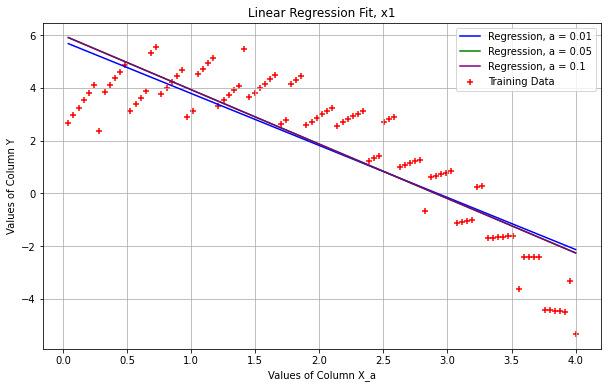

In [48]:
# Plot results of linear regression of list x1 vs. y
plt.scatter(X_a[:,1], Y, color='red', marker= '+', label= 'Training Data')

plt.plot(X_a[:,1],X_a.dot(theta1_1), color='blue', label='Regression, a = 0.01')
plt.plot(X_a[:,1],X_a.dot(theta1_2), color='green', label='Regression, a = 0.05')
plt.plot(X_a[:,1],X_a.dot(theta1_3), color='purple', label='Regression, a = 0.1')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Values of Column X_a')
plt.ylabel('Values of Column Y')
plt.title('Linear Regression Fit, x1')
plt.legend()

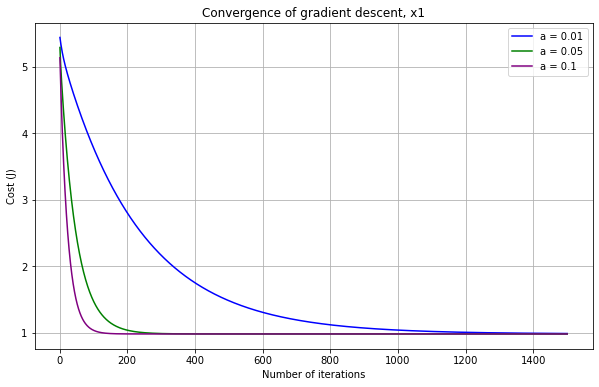

In [14]:
# Plot convergence of gradient descent of x1 vs. y 
plt.plot(range(1, iterations + 1),cost_history1_1, color='blue', label='a = 0.01')
plt.plot(range(1, iterations + 1),cost_history1_2, color='green', label='a = 0.05')
plt.plot(range(1, iterations + 1),cost_history1_3, color='purple', label='a = 0.1')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent, x1')
plt.legend()

In [38]:
# Test on data in list x2 and Y
theta = [0., 0.]
iterations = 200;

alpha2_1 = 0.01;
alpha2_2 = 0.05;
alpha2_3 = 0.1;

In [39]:
theta2_1, cost_history2_1 = gradient_descent(X_b, Y, theta, alpha2_1, iterations)
theta2_2, cost_history2_2 = gradient_descent(X_b, Y, theta, alpha2_2, iterations)
theta2_3, cost_history2_3 = gradient_descent(X_b, Y, theta, alpha2_3, iterations)

print('Final value of theta2_1 =', theta2_1)

print('Final value of theta2_2 =', theta2_2)

print('Final value of theta2_3 =', theta2_3)

Final value of theta2_1 = [0.45339876 0.65720534]
Final value of theta2_2 = [0.70563651 0.55846941]
Final value of theta2_3 = [0.75071106 0.5408249 ]


In [46]:
C = X_b.dot(theta1_1)
print(C)

[ 5.4915246   4.12167815  2.75183171  1.38198526  0.01213881 -1.35770763
  5.15702721  3.78718077  2.41733432  1.04748787 -0.32235857 -1.69220502
  4.82252982  3.45268338  2.08283693  0.71299048 -0.65685596 -2.02670241
  4.48803244  3.11818599  1.74833954  0.3784931  -0.99135335  5.52338149
  4.15353505  2.7836886   1.41384215  0.04399571 -1.32585074  5.18888411
  3.81903766  2.44919121  1.07934477 -0.29050168 -1.66034813  4.85438672
  3.48454027  2.11469383  0.74484738 -0.62499907 -1.99484551  4.51988933
  3.15004288  1.78019644  0.41034999 -0.95949646  5.55523839  4.18539194
  2.8155455   1.44569905  0.0758526  -1.29399384  5.220741    3.85089455
  2.48104811  1.11120166 -0.25864479 -1.62849123  4.88624361  3.51639717
  2.14655072  0.77670427 -0.59314217 -1.96298862  4.55174622  3.18189978
  1.81205333  0.44220688 -0.92763956  5.58709528  4.21724884  2.84740239
  1.47755594  0.1077095  -1.26213695  5.2525979   3.88275145  2.512905
  1.14305855 -0.22678789 -1.59663434  4.91810051  3.5

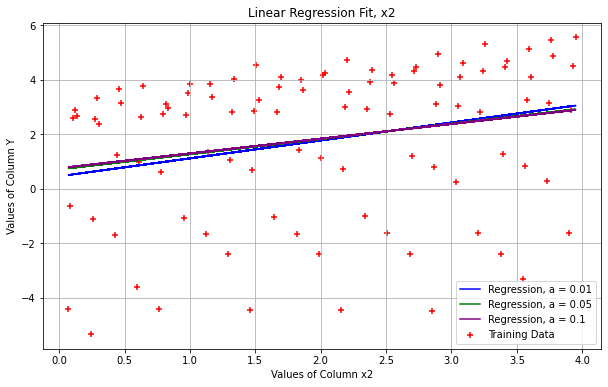

In [49]:
# Plot results of linear regression of list x2 vs. y
plt.scatter(X_b[:,1], Y, color='red', marker= '+', label= 'Training Data')

plt.plot(X_b[:,1],X_b.dot(theta2_1), color='blue', label='Regression, a = 0.01')
plt.plot(X_b[:,1],X_b.dot(theta2_2), color='green', label='Regression, a = 0.05')
plt.plot(X_b[:,1],X_b.dot(theta2_3), color='purple', label='Regression, a = 0.1')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Values of Column x2')
plt.ylabel('Values of Column Y')
plt.title('Linear Regression Fit, x2')
plt.legend()

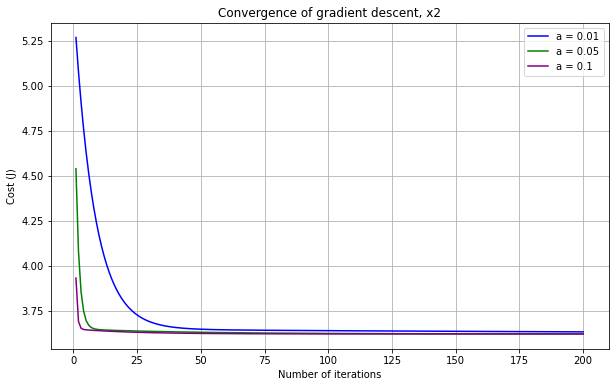

In [41]:
plt.plot(range(1, iterations + 1),cost_history2_1, color='blue', label='a = 0.01')
plt.plot(range(1, iterations + 1),cost_history2_2, color='green', label='a = 0.05')
plt.plot(range(1, iterations + 1),cost_history2_3, color='purple', label='a = 0.1')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent, x2')
plt.legend()

In [37]:
# Test on data in list x3 and Y
theta = [0., 0.]
iterations = 500;

alpha3_1 = 0.01;
alpha3_2 = 0.05;
alpha3_3 = 0.1;

In [22]:
theta3_1, cost_history3_1 = gradient_descent(X_c, Y, theta, alpha3_1, iterations)
theta3_2, cost_history3_2 = gradient_descent(X_c, Y, theta, alpha3_2, iterations)
theta3_3, cost_history3_3 = gradient_descent(X_c, Y, theta, alpha3_3, iterations)

print('Final value of theta =', theta3_1)

print('Final value of theta =', theta3_2)

print('Final value of theta =', theta3_3)

Final value of theta = [ 1.95218604 -0.16048378]
Final value of theta = [ 2.80353067 -0.49616099]
Final value of theta = [ 2.81353096 -0.50010401]


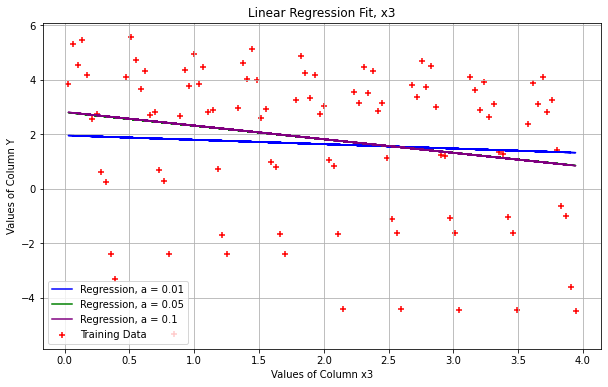

In [50]:
# Plot results of linear regression of list x3 vs. y
plt.scatter(X_c[:,1], Y, color='red', marker= '+', label= 'Training Data')

plt.plot(X_c[:,1],X_c.dot(theta3_1), color='blue', label='Regression, a = 0.01')
plt.plot(X_c[:,1],X_c.dot(theta3_2), color='green', label='Regression, a = 0.05')
plt.plot(X_c[:,1],X_c.dot(theta3_3), color='purple', label='Regression, a = 0.1')

#plt.plot(X_c[:,1],X_c.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Values of Column x3')
plt.ylabel('Values of Column Y')
plt.title('Linear Regression Fit, x3')
plt.legend()

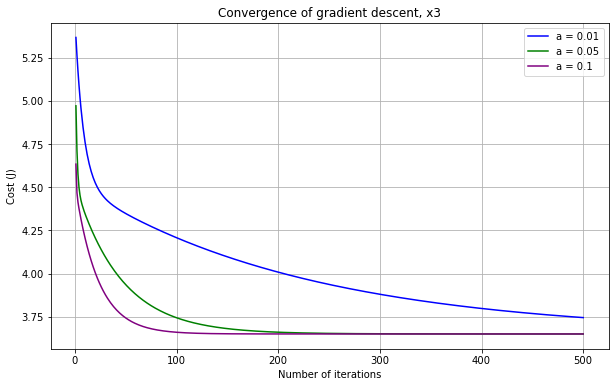

In [24]:
plt.plot(range(1, iterations + 1),cost_history3_1, color='blue', label='a = 0.01')
plt.plot(range(1, iterations + 1),cost_history3_2, color='green', label='a = 0.05')
plt.plot(range(1, iterations + 1),cost_history3_3, color='purple', label='a = 0.1')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent, x3')
plt.legend()

In [51]:
###### PROBLEM 2 ##############################################################################

# Stack column vectors X_0, X_1, X_2, X_3
X_abc = np.hstack((X_0, X_1, X_2, X_3))

print('X_abc = ')
print(X_abc[:5])

size = np.shape(X_abc)
size

X_abc = 
[[1.         0.04040404 0.13494949 0.88848485]
 [1.         0.08080808 0.82989899 1.3369697 ]
 [1.         0.12121212 1.52484848 1.78545455]
 [1.         0.16161616 2.21979798 2.23393939]
 [1.         0.2020202  2.91474747 2.68242424]]


(99, 4)

In [52]:
# Test on multivariable funtion, Y = theta[0]*1 + theta[1]*(x1) + theta[2]*(x3) + theta[3]*(x3)

theta = [0., 0., 0., 0.] # row vector for Theta initialized to 0
iterations = 2000;

alpha1 = 0.01; # Comparing 3 different training rates
alpha2 = 0.05;
alpha3 = 0.1;

In [53]:
theta1, cost_history1 = gradient_descent(X_abc, Y, theta, alpha1, iterations)
theta2, cost_history2 = gradient_descent(X_abc, Y, theta, alpha2, iterations)
theta3, cost_history3 = gradient_descent(X_abc, Y, theta, alpha3, iterations)

print('Final value of theta1 =', theta1)

print('Final value of theta2 =', theta2)

print('Final value of theta3 =', theta3)

Final value of theta1 = [ 4.68730641 -1.93677484  0.67644283 -0.18436408]
Final value of theta2 = [ 5.41349771 -2.04199406  0.56126134 -0.29209163]
Final value of theta3 = [ 5.41374858 -2.04203041  0.56122155 -0.29212884]


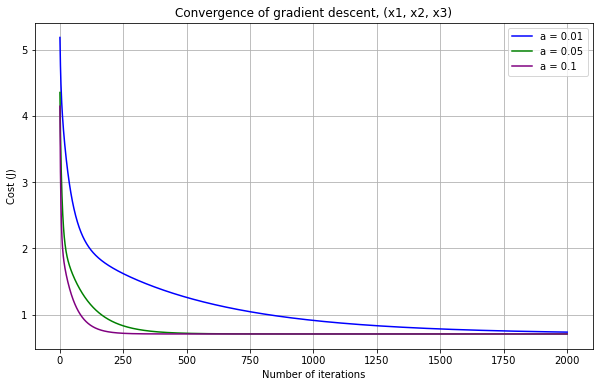

In [54]:
plt.plot(range(1, iterations + 1),cost_history1, color='blue', label='a = 0.01')
plt.plot(range(1, iterations + 1),cost_history2, color='green', label='a = 0.05')
plt.plot(range(1, iterations + 1),cost_history3, color='purple', label='a = 0.1')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent, (x1, x2, x3)')
plt.legend()

In [55]:
# Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)
Y1_predict = np.sum(theta3)
Y2_predict = theta3[0] + theta3[1]*2 + theta3[3]*4
Y3_predict = theta3[0] + theta3[1]*3 + theta3[2]*2 + theta3[3]

print('Predicted value for inputs (1, 1, 1): ', Y1_predict)
print('Predicted value for inputs (2, 0, 4): ', Y2_predict)
print('Predicted value for inputs (3, 2, 1): ', Y3_predict)

Predicted value for inputs (1, 1, 1):  3.6408108842000613
Predicted value for inputs (2, 0, 4):  0.16117239515388726
Predicted value for inputs (3, 2, 1):  0.11797162089905028
